In [1]:
import numpy as np
n_samples = 1000

#this is a function for creating delinearized data y=f(X)
#we use lambda expression
de_linearize = lambda X: np.cos(1.5 * np.pi * X) + np.cos( 5 * np.pi * X )

X = np.sort(np.random.rand(n_samples)) * 2
y = de_linearize(X) + np.random.randn(n_samples) * 0.1

In [2]:
#X

In [3]:
#y

In [4]:
from matplotlib import pyplot as plt

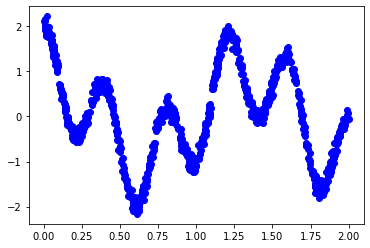

In [5]:
plt.scatter(X, y, c ="blue")
plt.show()

In [6]:
from sklearn.datasets import make_blobs
data, labels = make_blobs(n_samples=1000, centers=4, n_features=2,random_state=0)
print(data.shape, labels.shape)

(1000, 2) (1000,)


In [7]:
import matplotlib.colors
my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["black","blue","purple","grey"])

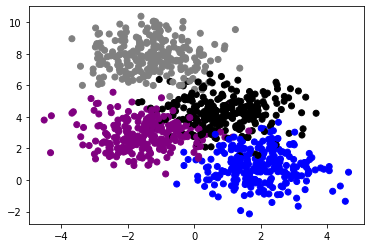

In [8]:
plt.scatter(data[:,0], data[:,1], c=labels, cmap=my_cmap)
plt.show()

In [9]:
labels_orig = labels
labels = np.mod(labels_orig, 2)

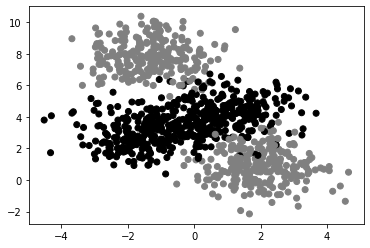

In [10]:
plt.scatter(data[:,0], data[:,1], c=labels, cmap=my_cmap)
plt.show()

In [11]:
test_x = np.array([[1.,2.,3.,4.]])
test_x.shape

(1, 4)

In [12]:
test_x.T.shape

(4, 1)

In [13]:
test_x1 = np.array([[1.,2.],[3.,4.],[3.,4.]])
test_x1.shape

(3, 2)

In [14]:
test_x1.T.shape

(2, 3)

In [15]:
W1 = np.array([[0.15,0.20],[0.25,0.30]])
W1.shape

(2, 2)

In [16]:
b1 = 0.35

In [17]:
W2 = np.array([[0.40,0.45]])
W2.shape

(1, 2)

In [18]:
b2 = 0.60

In [19]:
W2[0][0]

0.4

#  Feed Forward 

In [20]:
X_test = np.array([0.05,0.10])
Y_test = np.array([0.01])

# a1 = X.W1.Transpose + b1
a1 = np.dot(X_test,W1.T)+b1

a1.shape[0]

2

In [21]:
a1

array([0.3775, 0.3925])

In [22]:
from scipy.special import expit

#calculate stable sigmoid function for each value in list 
# if X>=0 then 1/(1+e**(-x))
# if X<0 then np.exp(x)/(1 + np.exp(x))
H1 = expit(a1)
H1


array([0.59326999, 0.59688438])

In [23]:
# a2 = H1.W2.Transpose + b2
a2 = np.dot(H1,W2.T)+b2

a2

array([1.10590597])

In [24]:
H2 = expit(a2)
H2

array([0.75136507])

In [25]:
#H2 is the predicted output
from sklearn.metrics import mean_squared_error

Y_true = Y_test
Y_pred = H2

#  np.square(np.subtract(Y_true,Y_pred)).mean()
Error = mean_squared_error(Y_true,Y_pred) 
Error

0.54962216635231

# dE/dW211 
# = dE/dH21 *  dH21/da21    *    da21/dW211
#                      (H21 - Y1) .                (H21)(1 - H21).           (H11)

In [26]:
dE_dH21 = H2[0] - Y_true[0]
dH21_da21 = H2[0]*(1-H2[0])
da21_dW211 = H1[0]
dE_dW211 = dE_dH21 * dH21_da21 * da21_dW211
dE_dW211

0.08216704056423078

In [27]:
# dE/dW212 
# = dE/dH21 *  dH21/da21    *    da21/dW212
da21_dW212 = H1[1]
dE_dW212 = dE_dH21 * dH21_da21 * da21_dW212
dE_dW212

0.08266762784753326

In [28]:
dE_db2 = dE_dH21 * dH21_da21
dE_db2

0.13849856162855698

In [29]:
dE_W2 = np.array([[dE_dW211,dE_dW212]])
eta = 0.5
W2_new = np.subtract(W2,np.multiply(dE_W2,eta))
W2

array([[0.4 , 0.45]])

In [30]:
W2_new

array([[0.35891648, 0.40866619]])

In [31]:
b2_new = b2 - eta*dE_db2
b2_new

0.5307507191857215

In [32]:
b2

0.6

# dE/dW111 
# = dE/dH21 *  dH21/da21    *    da21/dH11 *  dH11/da11 * da11/dW111
#      (H21 - Y1) . (H21)(1 - H21). (W211) .        (H11)(1-H11). (X1) 

In [33]:
dE_dW111 = dE_dH21 * dH21_da21 * W2[0][0] * H1[0] * (1-H1[0])* X_test[0]
dE_dW112 = dE_dH21 * dH21_da21 * W2[0][0] * H1[0] * (1-H1[0])* X_test[1]

dE_dW121 = dE_dH21 * dH21_da21 * W2[0][1] * H1[1] * (1-H1[1])* X_test[0]
dE_dW122 = dE_dH21 * dH21_da21 * W2[0][1] * H1[1] * (1-H1[1])* X_test[1]

dE_W1 = np.array([[dE_dW111,dE_dW112],[dE_dW121,dE_dW122]])
dE_W1

array([[0.0006684 , 0.00133679],
       [0.0007498 , 0.00149961]])

In [34]:
W1_new = np.subtract(W1,np.multiply(dE_W1,eta))
W1

array([[0.15, 0.2 ],
       [0.25, 0.3 ]])

In [35]:
W1_new

array([[0.1496658, 0.1993316],
       [0.2496251, 0.2992502]])

In [36]:
dE_db1 = dE_dH21 * dH21_da21 * W2[0][0] * H1[0] * (1-H1[0]) + dE_dH21 * dH21_da21 * W2[0][1] * H1[1] * (1-H1[1])
dE_db1

0.028363995911784318

In [37]:
b1_new = b1 - eta*dE_db1
b1_new 

0.33581800204410783

In [38]:
b1

0.35

In [39]:
def test():
    return 2,2

a,b = test()


In [40]:
from scipy.special import expit

from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

class Mini_NeuralNetwork:
    def __init__(self, learning_rate=0.5, iterations = 1000):
        self.eta = learning_rate
        self.itr = iterations
        self.W1 = np.array([[0.15,0.20],[0.25,0.30]])
        self.b1 = 0.35
        self.W2 = np.array([[0.40,0.45]])
        self.b2 = 0.60
        
        self.a1 = None
        self.H1 = None
        self.a2 = None
        self.H2 = None
        self.Error = []
    
    def feedForward(self, X):
        # a1 = X.W1.Transpose + b1
        self.a1 = np.dot(X,self.W1.T)+self.b1
        
        #calculate stable sigmoid function for each value in list 
        # if X>=0 then 1/(1+e**(-x))
        # if X<0 then np.exp(x)/(1 + np.exp(x))
        self.H1 = expit(self.a1)
        
        # a2 = H1.W2.Transpose + b2
        self.a2 = np.dot(self.H1,self.W2.T)+self.b2
        
        self.H2 = expit(self.a2)
        
    
    def get_dE_dW2_and_dE_db2(self,Y_test):
        Y_true = [Y_test]
        
        dE_dH21 = self.H2[0] - Y_true[0]
        dH21_da21 = self.H2[0]*(1-self.H2[0])
        
        da21_dW211 = self.H1[0]
        dE_dW211 = dE_dH21 * dH21_da21 * da21_dW211
        
        
        # dE/dW212 
        # = dE/dH21 *  dH21/da21    *    da21/dW212
        da21_dW212 = self.H1[1]
        dE_dW212 = dE_dH21 * dH21_da21 * da21_dW212
        
        dE_W2 = np.array([[dE_dW211,dE_dW212]])
        
        dE_db2 = dE_dH21 * dH21_da21
        return dE_W2,dE_db2
    
    def get_dE_dW1_and_dE_db1(self, X_test, Y_test):
        Y_true = [Y_test]
        dE_dH21 = self.H2[0] - Y_true[0]
        dH21_da21 = self.H2[0]*(1-self.H2[0])
        
        dE_dW111 = dE_dH21 * dH21_da21 * self.W2[0][0] * self.H1[0] * (1-self.H1[0])* X_test[0]
        dE_dW112 = dE_dH21 * dH21_da21 * self.W2[0][0] * self.H1[0] * (1-self.H1[0])* X_test[1]

        dE_dW121 = dE_dH21 * dH21_da21 * self.W2[0][1] * self.H1[1] * (1-self.H1[1])* X_test[0]
        dE_dW122 = dE_dH21 * dH21_da21 * self.W2[0][1] * self.H1[1] * (1-self.H1[1])* X_test[1]

        dE_W1 = np.array([[dE_dW111,dE_dW112],[dE_dW121,dE_dW122]])
        
        dE_db1 = dE_dH21 * dH21_da21 * self.W2[0][0] * self.H1[0] * (1-self.H1[0]) + dE_dH21 * dH21_da21 * self.W2[0][1] * self.H1[1] * (1-self.H1[1])
        return dE_W1,dE_db1
        

    
    def backPropagate(self,X, Y_true):
        dE_W2,dE_db2 = self.get_dE_dW2_and_dE_db2(Y_true)
        dE_W1,dE_db1 = self.get_dE_dW1_and_dE_db1(X, Y_true)
        #print(dE_W2,dE_db2,dE_W1,dE_db1)
        return dE_W2,dE_db2,dE_W1,dE_db1
        
    def train(self,X,Y):
        print("self.W2:",self.W2)
        print("self.W1:",self.W1)
        print("self.b2:",self.b2)
        print("self.b1:",self.b1)
        print("")
        for iter in range(self.itr):
            dE_W2 = np.array([[0,0]])
            dE_db2 = 0
            dE_W1 = np.array([[0,0],[0,0]])
            dE_db1 = 0
            for x,y in zip(X,Y):
                self.feedForward(x)
                t_dE_W2, t_dE_db2, t_dE_W1, t_dE_db1 = self.backPropagate(x,y)
                dE_db2 += t_dE_db2
                dE_db1 += t_dE_db1
                dE_W2 = np.add(dE_W2,t_dE_W2)
                dE_W1 = np.add(dE_W1,t_dE_W1)
                #print(dE_db2)
            
            self.W2 = np.subtract(self.W2,np.multiply(dE_W2,self.eta))
        
            self.b2 = self.b2 - self.eta*dE_db2
            self.W1 = np.subtract(self.W1,np.multiply(dE_W1,self.eta))
        
            self.b1 = self.b1 - self.eta*dE_db1
            
            print("Epoch No.: ", iter)
            print("self.W2:",self.W2)
            print("self.W1:",self.W1)
            print("self.b2:",self.b2)
            print("self.b1:",self.b1)
            print("Error: ",self.getError(X,Y))
            print("")
            #if iter==1:
            #    break
            
    def getError(self, X, Y_true):
        Y_pred = self.test(X, Y_true)
        error = mean_squared_error(Y_true,Y_pred)
        self.Error.append(error)
        return error
    
    def plotError(self):
        plt.plot(self.Error)
        plt.xlabel('Epochs')
        plt.ylabel('Mean Squared Error')
        plt.show()
                
    def test(self,X,Y):
        Y_pred = []
        for x,y in zip(X,Y):
            self.feedForward(x)
            Y_pred.append(self.H2);
        
        #print("Y_pred")
        #print(Y_pred)
        return Y_pred 

In [41]:
X_train, X_test, Y_train, Y_test = train_test_split(data, labels, stratify=labels, random_state=0)
print(X_train.shape, X_test.shape)

(750, 2) (250, 2)


In [42]:
mini_NeuralNetwork = Mini_NeuralNetwork(learning_rate = 0.01, iterations=1000)
mini_NeuralNetwork.train(X_train, Y_train)


self.W2: [[0.4  0.45]]
self.W1: [[0.15 0.2 ]
 [0.25 0.3 ]]
self.b2: 0.6
self.b1: 0.35

Epoch No.:  0
self.W2: [[0.13850604 0.17215819]]
self.W1: [[0.17819486 0.09820433]
 [0.28509176 0.20035833]]
self.b2: 0.23374319020611894
self.b1: 0.29194655112739376
Error:  0.2602351780038243

Epoch No.:  1
self.W2: [[0.0255377  0.05498083]]
self.W1: [[0.18838518 0.08243948]
 [0.29999168 0.1769084 ]]
self.b2: 0.03383035794464789
self.b1: 0.2770028178248765
Error:  0.24986793920588518

Epoch No.:  2
self.W2: [[0.01888052 0.05834581]]
self.W1: [[0.19022321 0.08342237]
 [0.30445625 0.17642173]]
self.b2: -0.008266646545978251
self.b1: 0.2756449160291918
Error:  0.24949415512916756

Epoch No.:  3
self.W2: [[0.02573376 0.07692414]]
self.W1: [[0.19157835 0.08448979]
 [0.30913325 0.17685281]]
self.b2: -0.029781467823295386
self.b1: 0.2746328440258288
Error:  0.24925819071547414

Epoch No.:  4
self.W2: [[0.03380424 0.09702926]]
self.W1: [[0.19341981 0.0859691 ]
 [0.31524684 0.17756984]]
self.b2: -0.04955836

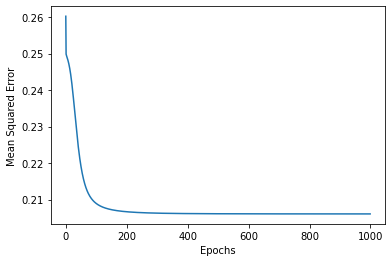

In [43]:
mini_NeuralNetwork.plotError()

In [44]:
y_pred = mini_NeuralNetwork.test(X_test,Y_test)
Y_pred = np.array(y_pred)
Y_pred_binarised = (Y_pred >= 0.5).astype("int").ravel()
accuracy = accuracy_score(Y_pred_binarised, Y_test)
print("Accuracy of mini_NeuralNetwork for test data is: ", accuracy)

Accuracy of mini_NeuralNetwork for test data is:  0.66


# REUSING Shrayank's Sigmoid neuron class

In [45]:
from tqdm import tqdm

class SigmoidNeuron:
    
  def __init__(self):
    self.w = None
    self.b = None
    
  def perceptron(self, x):
    return np.dot(x, self.w.T) + self.b
  
  def sigmoid(self, x):
    return 1.0/(1.0 + np.exp(-x))
  
  def grad_w_mse(self, x, y):
    y_pred = self.sigmoid(self.perceptron(x))
    return (y_pred - y) * y_pred * (1 - y_pred) * x
  
  def grad_b_mse(self, x, y):
    y_pred = self.sigmoid(self.perceptron(x))
    return (y_pred - y) * y_pred * (1 - y_pred)
  
  def grad_w_ce(self, x, y):
    y_pred = self.sigmoid(self.perceptron(x))
    if y == 0:
      return y_pred * x
    elif y == 1:
      return -1 * (1 - y_pred) * x
    else:
      raise ValueError("y should be 0 or 1")
    
  def grad_b_ce(self, x, y):
    y_pred = self.sigmoid(self.perceptron(x))
    if y == 0:
      return y_pred 
    elif y == 1:
      return -1 * (1 - y_pred)
    else:
      raise ValueError("y should be 0 or 1")
  
  def fit(self, X, Y, epochs=1, learning_rate=1, initialise=True, loss_fn="mse", display_loss=False):
    
    # initialise w, b
    if initialise:
      self.w = np.random.randn(1, X.shape[1])
      self.b = 0
      
    if display_loss:
      loss = {}
    
    for i in tqdm(range(epochs), total=epochs, unit="epoch"):
      dw = 0
      db = 0
      for x, y in zip(X, Y):
        if loss_fn == "mse":
          dw += self.grad_w_mse(x, y)
          db += self.grad_b_mse(x, y) 
        elif loss_fn == "ce":
          dw += self.grad_w_ce(x, y)
          db += self.grad_b_ce(x, y)
          
      m = X.shape[1]  
      self.w -= learning_rate * dw/m
      self.b -= learning_rate * db/m
      
      if display_loss:
        Y_pred = self.sigmoid(self.perceptron(X))
        if loss_fn == "mse":
          loss[i] = mean_squared_error(Y, Y_pred)
        elif loss_fn == "ce":
          loss[i] = log_loss(Y, Y_pred)
    
    if display_loss:
      plt.plot(loss.values())
      plt.xlabel('Epochs')
      if loss_fn == "mse":
        plt.ylabel('Mean Squared Error')
      elif loss_fn == "ce":
        plt.ylabel('Log Loss')
      plt.show()
      
  def predict(self, X):
    Y_pred = []
    for x in X:
      y_pred = self.sigmoid(self.perceptron(x))
      Y_pred.append(y_pred)
    return np.array(Y_pred)

100%|███████████████████████████████████████████████████████████████████████████| 1000/1000 [00:40<00:00, 24.50epoch/s]


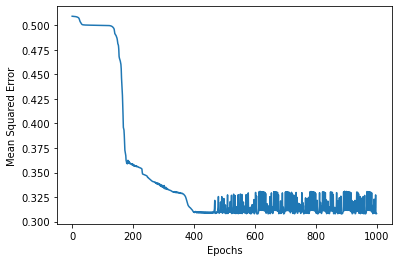

In [46]:
sn = SigmoidNeuron()
sn.fit(X_train, Y_train, epochs=1000, learning_rate=0.5, display_loss=True)

In [47]:
Y_pred_val = sn.predict(X_test)
Y_pred_binarised_val = (Y_pred_val >= 0.5).astype("int").ravel()

accuracy_val = accuracy_score(Y_pred_binarised_val, Y_test)

print("Validation accuracy", round(accuracy_val, 2))

Validation accuracy 0.65
